In [1]:
import requests
import urllib.parse
import pickle


In [2]:
city = "CHARNI ROAD,Mumbai"
address=urllib.parse.quote(city)
country = "India"

In [3]:
url = "https://nominatim.openstreetmap.org/?addressdetails=1&q=" + address + "+" + country +"&format=json&limit=1"

In [4]:
response = requests.get(url).json()
"""
def check(x,y):
    try:
        x=response[0]["lat"]
        y=response[0]["lon"]


    except IndexError:
        print("Address is invalid")

    return x,y

result=""

if check(lat,lon) == "Address is invalid":
    result="Address is invalid"
else:
    lat=check(lat,lon)[0]
    lon=check(lat,lon)[1]
    result=f"Map cordinate:-{lat},{lon}"
    print(result)


"""


'\ndef check(x,y):\n    try:\n        x=response[0]["lat"]\n        y=response[0]["lon"]\n\n\n    except IndexError:\n        print("Address is invalid")\n\n    return x,y\n\nresult=""\n\nif check(lat,lon) == "Address is invalid":\n    result="Address is invalid"\nelse:\n    lat=check(lat,lon)[0]\n    lon=check(lat,lon)[1]\n    result=f"Map cordinate:-{lat},{lon}"\n    print(result)\n\n\n'

In [5]:
"""
# This for address
lat=response[0]["lat"]
lon=response[0]["lon"]

"""
# This for co-ordinate
lat=str(16.875017980322596)
lon=str(74.57008757356162)


In [6]:
ln=600
bd=300

In [7]:
def maptype(map):
    ln=600
    bd=300
    ratio=f"{bd}x{ln}"
    zoom="17"
    access_token="pk.eyJ1Ijoic2hldHR5a2FyYW41NyIsImEiOiJja3VwNHNuaGwyM242MzNvNnNlMm1obTdyIn0.1zYRiUsXVCn4YMJ94-Ng-Q"

    api=f"https://api.mapbox.com/styles/v1/mapbox/{map}/static/{lon},{lat},{zoom}/{ratio}?access_token={access_token}"
    return api[0:]



#response = requests.get(maptype("satellite-v9"))
#print(response.url)


In [8]:
# Querying a style with raster layers returns a JPEG
# and save the output as a JPEG image
# Retrieve a map at 72.873722 longitude, 19.211453 latitude, zoom 10.
# Bearing and pitch default to 0
# and save the output as a PNG image.


In [9]:

sample = requests.get(maptype("satellite-v9"))
print(f"Sample Status {sample.status_code}")

dark = requests.get(maptype("dark-v10"))
print(f"Dark Status {dark.status_code}")
light = requests.get(maptype("light-v10"))
print(f"Light Status {light.status_code}")
street = requests.get(maptype("streets-v11"))
print(f"Street Status {street.status_code}")
satellite = requests.get(maptype("satellite-v9"))
print(f"Satellite Status {satellite.status_code}")
street_old = requests.get(maptype("streets-v9"))
print(f"Street Status {street_old.status_code}")
satellite_new = requests.get(maptype("satellite-streets-v9"))
print(f"Satellite_new Status {satellite_new.status_code}")

Sample Status 200
Dark Status 200
Light Status 200
Street Status 200
Satellite Status 200
Street Status 200
Satellite_new Status 200


In [10]:
def file_name(name,file_t):
    file_t = f"/home/karan/Remote-vegetation-sensing/data/{file_t}.tiff"
    file = open(file_t[0:], "wb")
    file.write(name.content)
    file.close()
     

file_name(sample,"sample")
file_name(dark,"dark")
file_name(light,"light")
file_name(street,"street")
file_name(street_old,"street_old")
file_name(satellite,"satellite")
file_name(satellite_new,"satellite_new")





In [11]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image
#import xarray as xr
#import rioxarray as rxr

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go
import cv2
from PIL import Image

np.seterr(divide='ignore', invalid='ignore')


{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [12]:
%pwd
%ls

 LICENSE             data/                     test324.png
 Opencv.ipynb        foo.png                   test_application_v2.ipynb
 README.md           module/                   test_for_pdf.ipynb
 app.py              project/                  test_opencv.py
 books_read.tiff     requirements.txt          test_pdf_remote.ipynb
 cal_df_binned.pdf  'test application.ipynb'
 cal_df_binned.png   test.png


In [13]:
print('Check files ?:')
for name in glob('/home/karan/Remote-vegetation-sensing/data/*.tiff'):
    print(name)

Check files ?:
/home/karan/Remote-vegetation-sensing/data/dark.tiff
/home/karan/Remote-vegetation-sensing/data/satellite_new.tiff
/home/karan/Remote-vegetation-sensing/data/street_old.tiff
/home/karan/Remote-vegetation-sensing/data/street.tiff
/home/karan/Remote-vegetation-sensing/data/satellite.tiff
/home/karan/Remote-vegetation-sensing/data/sample.tiff
/home/karan/Remote-vegetation-sensing/data/light.tiff


In [14]:
S_sentinel_bands = glob(r"/home/karan/Remote-vegetation-sensing/data/*.tiff")
S_sentinel_bands.sort()
S_sentinel_bands


['/home/karan/Remote-vegetation-sensing/data/dark.tiff',
 '/home/karan/Remote-vegetation-sensing/data/light.tiff',
 '/home/karan/Remote-vegetation-sensing/data/sample.tiff',
 '/home/karan/Remote-vegetation-sensing/data/satellite.tiff',
 '/home/karan/Remote-vegetation-sensing/data/satellite_new.tiff',
 '/home/karan/Remote-vegetation-sensing/data/street.tiff',
 '/home/karan/Remote-vegetation-sensing/data/street_old.tiff']

In [15]:
l = []
for i in S_sentinel_bands:
  with rio.open(i, 'r') as f:
    l.append(f.read(1))

/home/karan/.local/lib/python3.8/site-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [16]:
arr_st = np.stack(l)

In [17]:
type(arr_st)

numpy.ndarray

In [18]:
arr_st.shape

(7, 600, 300)

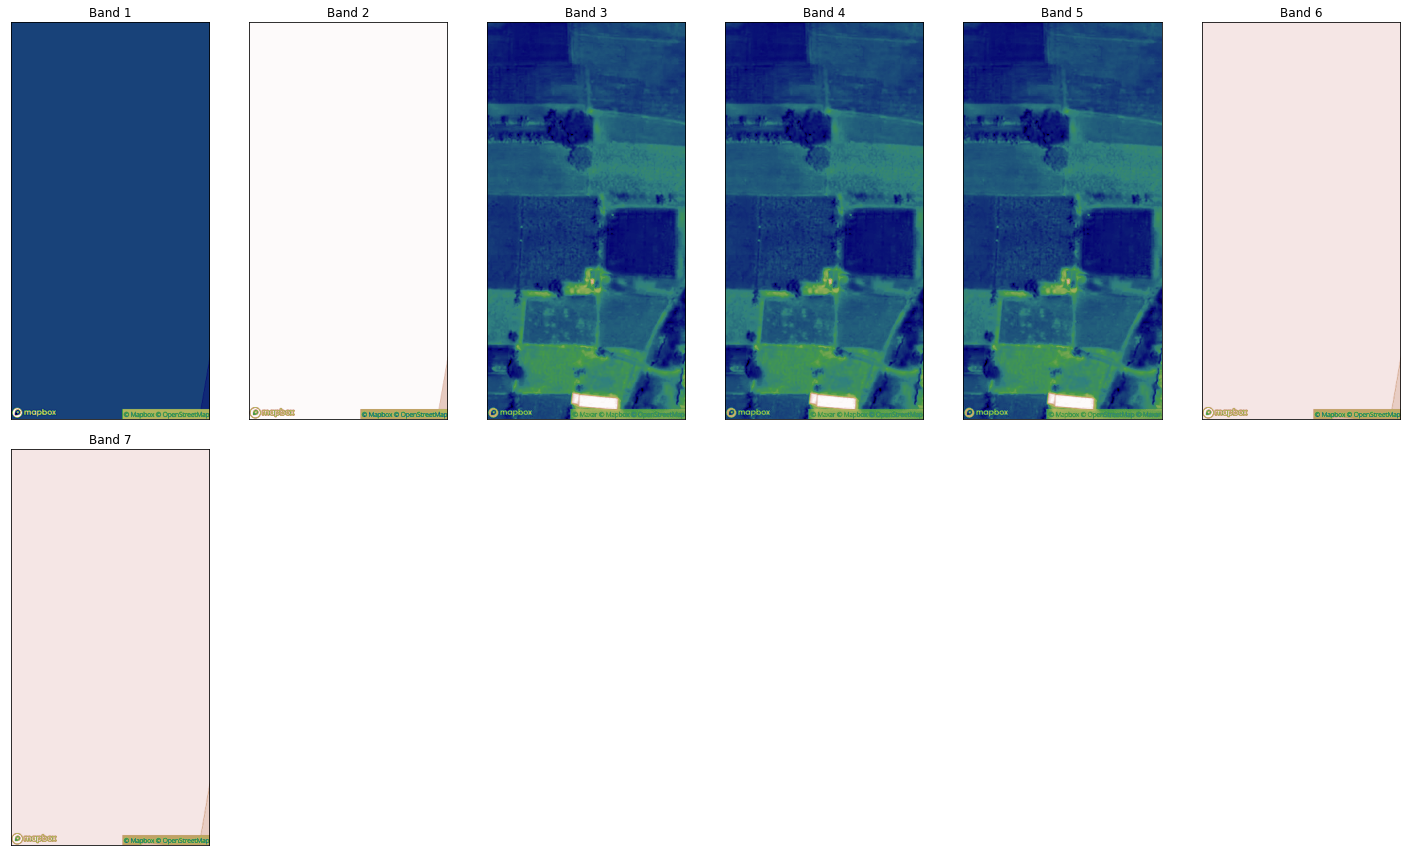

In [19]:
ep.plot_bands(arr_st, cmap = 'gist_earth', figsize = (20, 12), cols = 6, cbar = False)
plt.show()

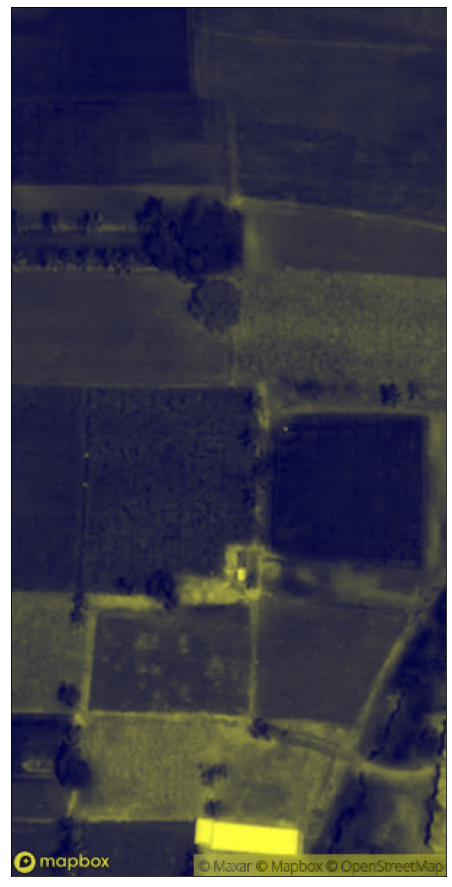

In [20]:
rgb = ep.plot_rgb(arr_st, 
                  rgb=(3,2,1), 
                  figsize=(10, 16), 
                  # title='RGB Composite Image'
                  )

plt.show()

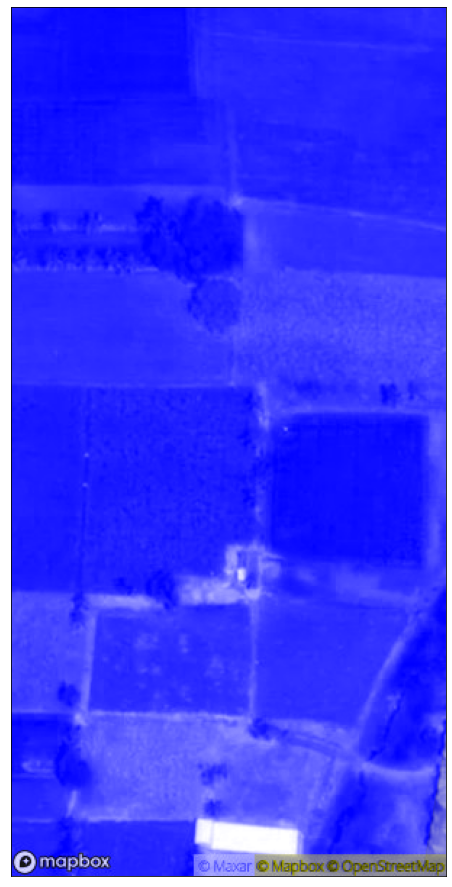

In [21]:
ep.plot_rgb(
    arr_st,
    rgb=(3, 2, 1),
    stretch=True,
    str_clip=0.2,
    figsize=(10, 16),
    # title="RGB Composite Image with Stretch Applied",
)

plt.show()

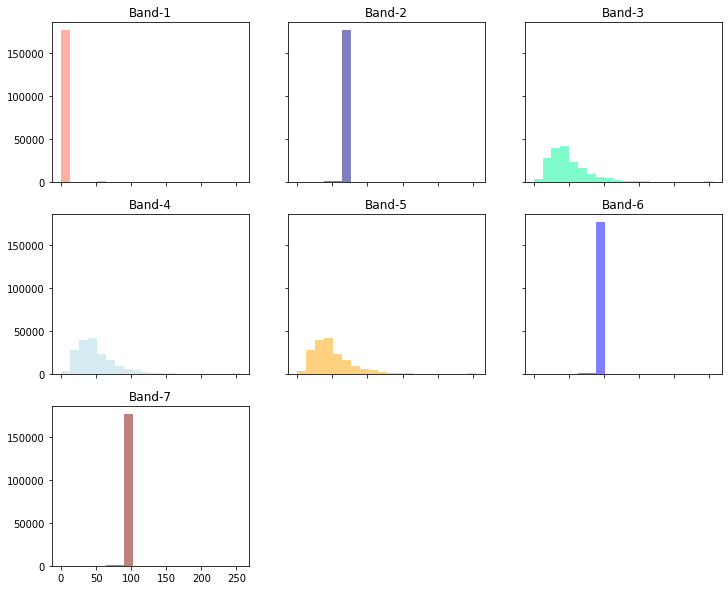

In [22]:
colors = ['tomato', 'navy', 'MediumSpringGreen', 'lightblue', 'orange', 'blue',
          'maroon']

ep.hist(arr_st, 
         colors = colors,
        title=[f'Band-{i}' for i in range(1, 8)], 
        cols=3, 
        alpha=0.5, 
        figsize = (12, 10)
        )

plt.show()

In [23]:
# Preprocessing 

In [24]:
x = np.moveaxis(arr_st, 0, -1)
x.shape
ln

600

In [25]:
x.reshape(-1, 7).shape, ln*bd

((180000, 7), 180000)

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_data = x.reshape(-1, 7)

scaler = StandardScaler().fit(X_data)

X_scaled = scaler.transform(X_data)

X_scaled.shape

(180000, 7)

In [27]:
## Principal Component Analysis (PCA)

In [28]:
pca = PCA(n_components = 7)

pca.fit(X_scaled)

data = pca.transform(X_scaled)

In [29]:
data.shape

(180000, 7)

In [30]:
pca.explained_variance_ratio_.cumsum()

array([0.5457454 , 0.89924542, 0.99872796, 0.99950643, 1.        ,
       1.        , 1.        ])

In [31]:
np.sum(pca.explained_variance_ratio_)

1.0

In [32]:
## Visualize Bands after PCA (Principle component analysis)

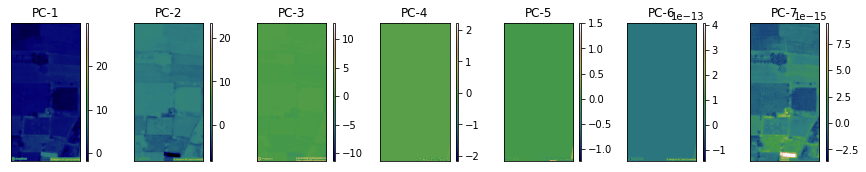

In [33]:
ep.plot_bands(np.moveaxis(data.reshape((ln, bd, data.shape[1])), -1, 0),
              cmap = 'gist_earth',
              cols = 7,
              title = [f'PC-{i}' for i in range(1,8)])

plt.show()

In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, random_state = 99)
kmeans.fit(data)

KMeans(n_clusters=5, random_state=99)

In [35]:
labels = kmeans.predict(data)

In [36]:
np.unique(labels)

array([0, 1, 2, 3, 4], dtype=int32)

In [37]:
## Visualize Clusters

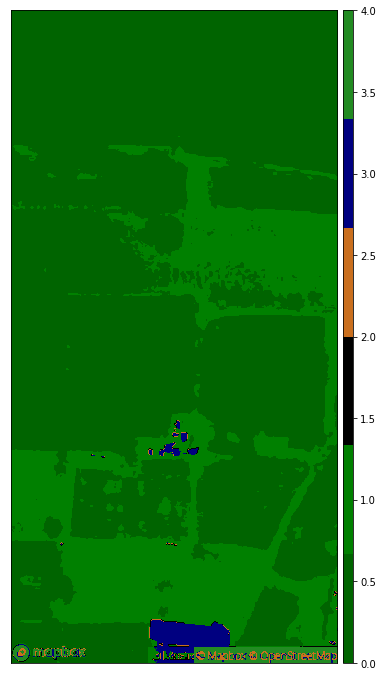

In [38]:
k=ep.plot_bands(labels.reshape(600, 300), cmap=ListedColormap(['darkgreen', 'green', 'black', '#CA6F1E', 'navy', 'forestgreen']))
plt.show()

In [39]:
import plotly.express as px

fig = px.imshow(labels.reshape(600, 300), 
          color_continuous_scale = ['darkgreen', 'green', 'black', '#CA6F1E', 'navy', 'forestgreen'])

fig.update_xaxes(showticklabels=False)

fig.update_yaxes(showticklabels=False)

fig=fig.update_layout(
    autosize=False,
    width=500,
    height=1000,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    # paper_bgcolor="LightSteelBlue",
)
type(fig)

plotly.graph_objs._figure.Figure

In [40]:
fig.show()

In [41]:
#NDVI
#Normalized Difference Vegetation Index (NDVI)
#NDVI = ((NIR - Red)/(NIR + Red))
#NIR = pixel values from the near-infrared band
#Red = pixel values from the red band

/home/karan/.local/lib/python3.8/site-packages/earthpy/spatial.py:109: Warning:

Divide by zero produced infinity values that will be replaced with nan values



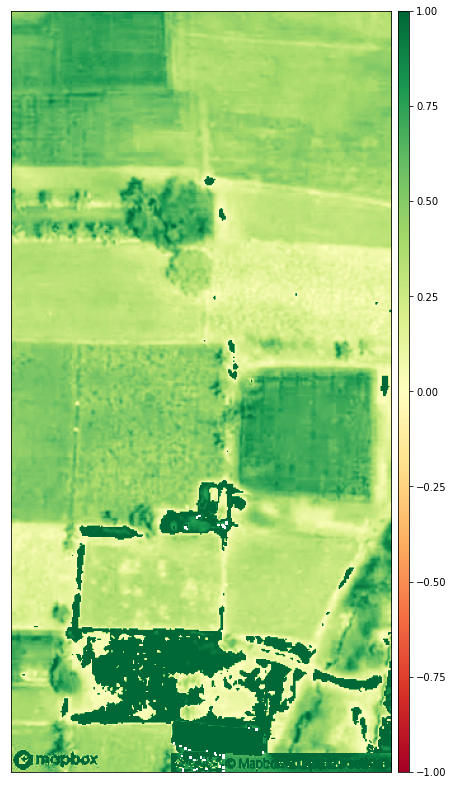

<Figure size 432x288 with 0 Axes>

In [42]:
ndvi = es.normalized_diff(arr_st[6], arr_st[3])

ndvi_image=ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.savefig('books_read.tiff')


In [43]:
type(ndvi_image)


"ndvi_image.figure.savefig('test.png')"


"ndvi_image.figure.savefig('test.png')"

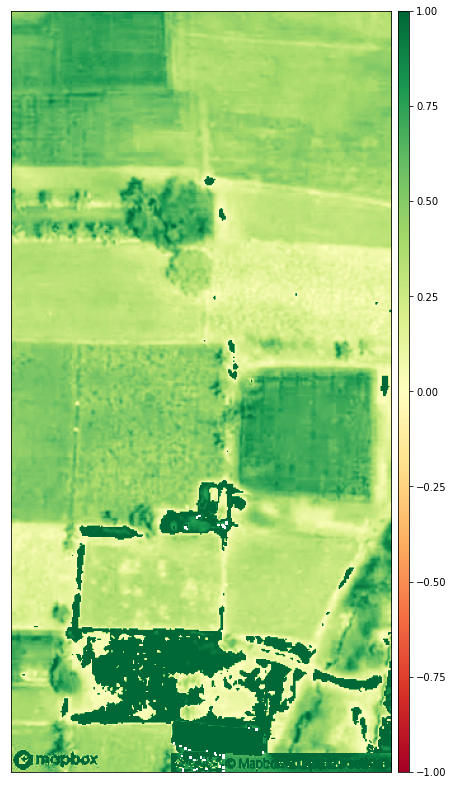

In [44]:
ndvi = es.normalized_diff(arr_st[6], arr_st[3])

ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

In [45]:
## Soil-Adjusted Vegetation Index (SAVI) 
#Soil-Adjusted Vegetation Index (SAVI)
#SAVI = ((NIR - Red) / (NIR + Red + L)) x (1 + L)
#NIR = pixel values from the near infrared band
#Red = pixel values from the near red band
#L = amount of green vegetation cover

In [46]:
L = 0.5

savi = ((arr_st[6] - arr_st[3]) / (arr_st[6] + arr_st[3] + L)) * (1 + L)

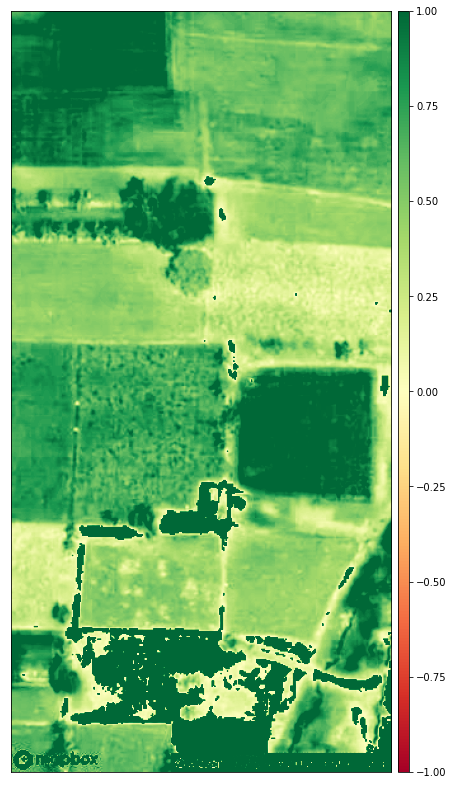

In [47]:
ep.plot_bands(savi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

In [67]:
#importing the module cv2 and numpy
import cv2
import numpy as np
#import skimage
import matplotlib.pyplot as plt
import pandas as pd

In [68]:
#reading the image which is to be converted to HSV color space
#HSV(Hue,Saturation,Value)
loc='/home/karan/Remote-vegetation-sensing/data/sample.tiff'
imagergb = cv2.imread(loc)
hsvImage = cv2.cvtColor(imagergb, cv2.COLOR_BGR2HSV)


In [69]:
#converting the image to HSV color space using cvtColor function 
#Saving the image
imagehsv = cv2.cvtColor(imagergb, cv2.COLOR_BGR2HSV)
cv2.imwrite("/home/karan/Remote-vegetation-sensing/module/sample.tiff", imagergb)
cv2.imwrite("/home/karan/Remote-vegetation-sensing/module/sample_hsv.tiff", imagehsv)



True

In [70]:
def imagemask(lower,upper,name):
    lower=np.array(lower)
    upper=np.array(upper)
    imagemask=cv2.inRange(imagehsv, lower, upper)
    cv2.imwrite(f"/home/karan/Remote-vegetation-sensing/module/{name}.tiff", imagemask)


In [71]:
# imagemask fucntion Syntax imagemask([lowerthreshold],[upperthreshold],nameoffile)
imagemask([60, 42, 43],[135, 255, 255],"crop")
imagemask([29, 72, 39],[42, 100, 250],"barenland")
imagemask([0, 0, 0],[359, 84, 80],"cultivated_land")
imagemask([0, 87, 69],[130, 100, 80],"tree")



In [72]:
original='/home/karan/Remote-vegetation-sensing/module/sample.tiff'
hsv="/home/karan/Remote-vegetation-sensing/module/sample_hsv.tiff"
tree="/home/karan/Remote-vegetation-sensing/module/tree.tiff"
barenland="/home/karan/Remote-vegetation-sensing/module/barenland.tiff"
cultivated_land="/home/karan/Remote-vegetation-sensing/module/cultivated_land.tiff"
crop="/home/karan/Remote-vegetation-sensing/module/crop.tiff"

In [73]:
def area(path,name):



    img = cv2.imread(str(path))

    # counting the number of pixels
    number_of_white_pix = np.sum(img == 255)
    number_of_black_pix = np.sum(img == 0)
    total=number_of_white_pix + number_of_black_pix
    percent=(number_of_white_pix/total)*100
    return {name:percent}


data={}
data.update({'Data' : 'percentage'})
data.update(area(tree,'tree'))
data.update(area(crop,'crop'))
data.update(area(barenland,'barenland'))
data.update(area(cultivated_land,'cultivated_land'))

total={}
total.update(area(tree,'tree'))
total.update(area(crop,'crop'))
total.update(area(barenland,'barenland'))
total.update(area(cultivated_land,'cultivated_land'))



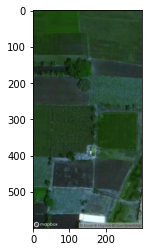

In [74]:
#Original Image
plt.imshow(imagergb)
plt.show()

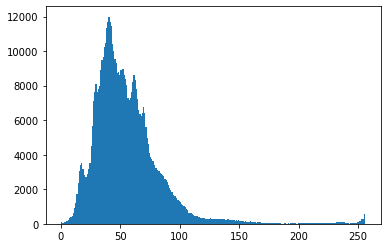

In [75]:
plt.hist(imagergb.ravel(),256,[0,256])
plt.show()

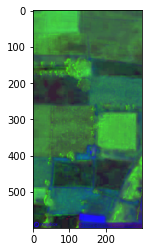

In [76]:
#Hsv image
hsv=cv2.imread(hsv)
plt.imshow(hsv)
plt.show()


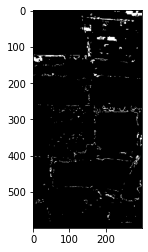

In [77]:
tree=cv2.imread(tree)
plt.imshow(tree)
plt.show()


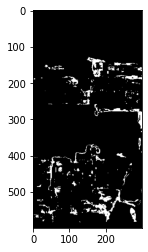

In [78]:
barenland=cv2.imread(barenland)
plt.imshow(barenland)
plt.show()

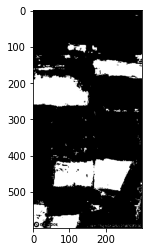

In [79]:
cultivated_land=cv2.imread(cultivated_land)
plt.imshow(cultivated_land)
plt.show()

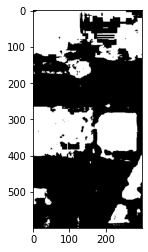

In [80]:
crop=cv2.imread(crop)
plt.imshow(crop)
plt.show()

In [81]:
print(total)


{'tree': 2.616111111111111, 'crop': 37.45333333333333, 'barenland': 5.5216666666666665, 'cultivated_land': 20.454444444444444}


In [82]:
print(total.keys())
print(total.values())

dict_keys(['tree', 'crop', 'barenland', 'cultivated_land'])
dict_values([2.616111111111111, 37.45333333333333, 5.5216666666666665, 20.454444444444444])


In [83]:
sizes = total.values()
labels = total.keys()
# if using a Jupyter notebook, include:
%matplotlib inline

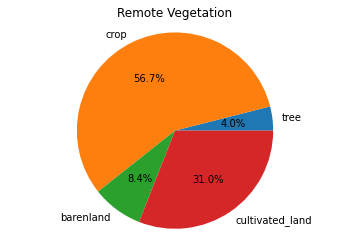

In [84]:
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Remote Vegetation')
plt.show()

In [94]:
data_dict = total
data_items = data_dict.items()
data_list = list(data_items)

df = pd.DataFrame(data_list)
df.columns =['Index', 'Average']
print(df)


             Index    Average
0             tree   2.616111
1             crop  37.453333
2        barenland   5.521667
3  cultivated_land  20.454444


In [109]:
from fpdf import FPDF
import matplotlib
import matplotlib.pyplot as plt


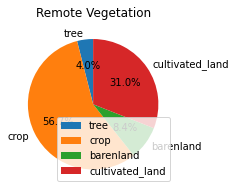

NameError: name 'cal_df_binned' is not defined

In [127]:
fig, ax = plt.subplots()
fig.set_size_inches(3, 3)
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
#ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Remote Vegetation')
plt.legend(loc='lower right')
plt.savefig('df.png')
plt.show()




In [128]:
pdf=FPDF(format='letter')
pdf.add_page() #always needed
pdf.set_font('arial', 'B', 11)
pdf.cell(60)
pdf.cell(75, 10, 'Remote Vegetation Index', 0, 2, 'C')
pdf.cell(90, 10, '', 0, 2, 'C')

In [129]:
columnNameList = list(df.columns)
for header in columnNameList[:-1]:
  pdf.cell(35, 10, header, 1, 0, 'C')
pdf.cell(35, 10, columnNameList[-1], 1, 1, 'C')
pdf.set_font('arial', '', 11)

In [130]:
for i in range(0, len(df)):
  pdf.cell(60)
  pdf.cell(35, 10, df['Index'][i], 1, 0, 'C')
  pdf.cell(35, 10, str(round(100 * df['Average'][i], 2)), 1, 1, 'C')
pdf.cell(90, 10, '', 0, 2, 'C')
pdf.cell(55, 10, '', 0, 0, 'C')


In [131]:
#insert chart
pdf.image('df.png', x = None, y = None, w=0, h=0, type='', link='')
pdf.output('df.pdf', 'F')


''